# ***Engr.Muhammad Javed***

## **Removal Outliers (IQR):**

## *Importing Required Libraries*


In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

## *Loading the Dataset*


In [2]:
Dataset = pd.read_csv(r"E:\AI and Data Science\ML with Engr.Muhammad Javed\File\loan.csv")


## *Viewing Statistical Summary of the Dataset*


In [3]:
Dataset.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## *Checking Dataset Information*


In [4]:
Dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## *Defining a Function to Calculate Outlier Boundaries using IQR Method*


In [14]:
def outlier_remover(s):
    q1 = np.percentile(s,25)
    q3 = np.percentile(s,75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return lower_bound , upper_bound


In [15]:
Q1 = Dataset["CoapplicantIncome"].quantile(0.25)
Q3 = Dataset["CoapplicantIncome"].quantile(0.75)
Q1 , Q3


(np.float64(0.0), np.float64(2297.25))

## *Displaying Outlier Boundaries for Coapplicant Income*


In [16]:
lower_bound , upper_bound = outlier_remover(Dataset.CoapplicantIncome  )
print(lower_bound , upper_bound)


-3445.875 5743.125


In [17]:
# Apply the function on clean salary data
lower_bound, upper_bound = outlier_remover(Dataset.CoapplicantIncome  )
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)


Lower Bound: -3445.875
Upper Bound: 5743.125


## *Identifying and Displaying Outliers in Coapplicant Income*


In [18]:
# Filter outliers
outliers1 = Dataset[(Dataset.CoapplicantIncome   < lower_bound) | (Dataset.CoapplicantIncome   > upper_bound)]
print("Outliers Found:")
print(outliers1)

Outliers Found:
      Loan_ID  Gender Married Dependents     Education Self_Employed  \
9    LP001020    Male     Yes          1      Graduate            No   
12   LP001028    Male     Yes          2      Graduate            No   
38   LP001114    Male      No          0      Graduate            No   
122  LP001431  Female      No          0      Graduate            No   
135  LP001488    Male     Yes         3+      Graduate            No   
177  LP001610    Male     Yes         3+      Graduate            No   
180  LP001633    Male     Yes          1      Graduate            No   
253  LP001843    Male     Yes          1  Not Graduate            No   
349  LP002138    Male     Yes          0      Graduate            No   
372  LP002201    Male     Yes          2      Graduate           Yes   
402  LP002297    Male      No          0      Graduate            No   
417  LP002342    Male     Yes          2      Graduate           Yes   
444  LP002424    Male     Yes          0      Gr

## *Removing Outliers and Keeping Only Valid Coapplicant Income Values*


In [19]:
outliers = Dataset[(Dataset.CoapplicantIncome   >= lower_bound) & (Dataset.CoapplicantIncome   <= upper_bound)]
print("Outliers Found:")
print(outliers)

Outliers Found:
      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0       

## *Visualizing Coapplicant Income After Removing Outliers*


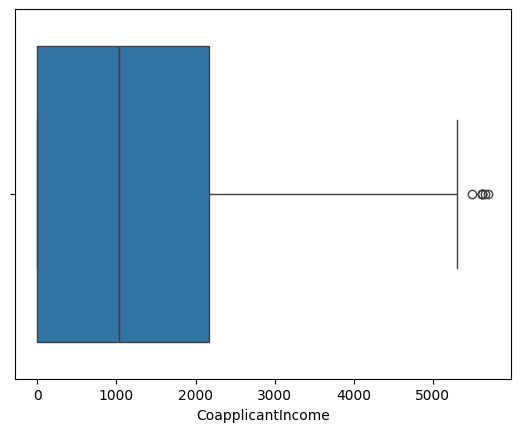

In [24]:
sn.boxplot(x = "CoapplicantIncome" , data = outliers)
plt.show()

In [29]:
lower_bound1 , upper_bound1 = outlier_remover(Dataset.ApplicantIncome  )
print(lower_bound1 , upper_bound1)

-1498.75 10171.25


In [30]:
# Apply the function on clean salary data
lower_bound, upper_bound = outlier_remover(Dataset.ApplicantIncome  )
print("Lower Bound:", lower_bound1)
print("Upper Bound:", upper_bound1)

Lower Bound: -1498.75
Upper Bound: 10171.25


## *Filtering Applicant Income Data Within Valid Outlier Range*


In [31]:
outlier2 = Dataset[(Dataset.ApplicantIncome   >= lower_bound1) & (Dataset.ApplicantIncome   <= upper_bound1)]
print("Outliers Found:")
print(outlier2)

Outliers Found:
      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0       

## *Visualizing Applicant Income After Removing Outliers*


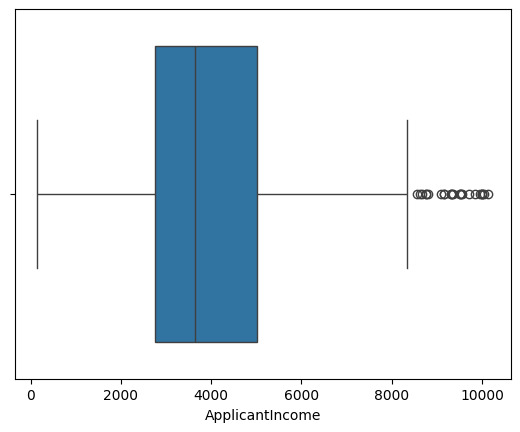

In [32]:
sn.boxplot(x = "ApplicantIncome" , data = outlier2)
plt.show()